# Feedback

## Load Modules

In [2]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print("file_dir: -> ",file_dir)

parent_dir = file_dir.parent
print(parent_dir)

sys.path.append(str(parent_dir))

file_dir: ->  C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\vkprog_analyse
C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


In [122]:
%load_ext autoreload
%autoreload
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pa_lib.data import (
    clean_up_categoricals
    )

from pa_lib.vis import (
    boxplot_histogram,
    )

from pa_lib.file import (
    project_dir,
    load_bin,
    load_csv,
    load_xlsx
    )
from pa_lib.util import (
    cap_words
    )                 
import os,fnmatch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


https://stackabuse.com/python-list-files-in-a-directory/

# Load Data (Feedback)

In [184]:
def load_feedback(sales_folder):
    sales_subfolder = os.listdir(sales_folder)
    pattern = "EK_LIST*.xlsx"
    
    container_df = pd.DataFrame()
    columns_in_xlsx = ["Gepard-Nr. Endkunde","Endkunde", "Chance","Feedback - bitte auswählen", "falls nicht hilfreich, bitte hier einen kurzen Kommentar angeben - entweder pro Zeile oder für die Gesamt-Liste" ]
    rename_columns = ["Endkunde_NR", "Endkunde", "Prob_1","Feedback", "Kommentar"]

    
    for kw_folder in sales_subfolder:

        if kw_folder >= "2019_07_15": # Begin of automatisation

            all_files_list = os.listdir(sales_folder / kw_folder)

            for file in all_files_list:

                if fnmatch.fnmatch(file, pattern):
                    #print(f"{kw_folder}  ---- {file}") # Check!
                    vkber_df = (
                        load_xlsx(
                            sales_folder / kw_folder / file
                            )
                        .loc[:,columns_in_xlsx]
                        )#.iloc[:,[0,1,-3,-2,-1]])
                    
                    vkber_df.columns = rename_columns

                    vkber_df.loc[:,"folder"] = kw_folder
                    vkber_df.loc[:,"file_name"] = file

                    container_df = (
                        container_df.append(vkber_df,ignore_index=False)
                        )
    
    #Remove all redundant rows:
    feedback_exists = (
        (   # Feedback or Kommentar exists
            ~container_df.loc[:, "Feedback"].isna() |
            ~container_df.loc[:,"Kommentar"].isna()
            ) & # Endkunde_NR must exist
            ~container_df.loc[:,"Endkunde_NR"].isna()
        )
    
    return container_df.loc[feedback_exists,:].sort_values(["folder","file_name"], ascending=[False,True])

In [185]:
sales_folder = Path('P:\Service\Kennzahlen\Verkauf\PredictiveAnalytics')
print(sales_folder)

P:\Service\Kennzahlen\Verkauf\PredictiveAnalytics


In [186]:
raw_feedback = load_feedback(sales_folder=sales_folder)

09:46:31 [INFO] Started loading xlsx file ...
09:46:31 [INFO] Reading from file \\fppwi01\daten$\Service\Kennzahlen\Verkauf\PredictiveAnalytics\2019_07_15\EK_LIST_2W_KOMPAKT_ABS.xlsx
09:46:31 [INFO] ... finished loading xlsx file in 0.03s (0.02s CPU)
09:46:31 [INFO] Started loading xlsx file ...
09:46:31 [INFO] Reading from file \\fppwi01\daten$\Service\Kennzahlen\Verkauf\PredictiveAnalytics\2019_07_15\EK_LIST_2W_KOMPAKT_ACO.xlsx
09:46:31 [INFO] ... finished loading xlsx file in 0.03s (0.02s CPU)
09:46:31 [INFO] Started loading xlsx file ...
09:46:31 [INFO] Reading from file \\fppwi01\daten$\Service\Kennzahlen\Verkauf\PredictiveAnalytics\2019_07_15\EK_LIST_2W_KOMPAKT_BAM.xlsx
09:46:31 [INFO] ... finished loading xlsx file in 0.03s (0.03s CPU)
09:46:31 [INFO] Started loading xlsx file ...
09:46:31 [INFO] Reading from file \\fppwi01\daten$\Service\Kennzahlen\Verkauf\PredictiveAnalytics\2019_07_15\EK_LIST_2W_KOMPAKT_BEG.xlsx
09:46:31 [INFO] ... finished loading xlsx file in 0.03s (0.02s C

# Feedback Count

In [191]:
print(f"shape: {raw_feedback.shape}")

shape: (742, 7)


In [192]:
min(raw_feedback.shape[0], 3000)

742

In [220]:
import pandas as pd
pd.set_option('display.max_rows', min(raw_feedback.shape[0]+1 ,3000))
pd.set_option("display.max_colwidth",500)

In [221]:
raw_feedback.sample(20)

,Endkunde_NR,Endkunde,Prob_1,Feedback,Kommentar,folder,file_name
9,636009,Larderie Optique Sierre SA,6.800000,hilfreich,Agence géré par DME,2019_10_21,EK_LIST_2W_KOMPAKT_MZB.xlsx
15,640778,Scic Sagl,2.500000,NaN,Cliente già contattato e già avuto tutte le comunicazioni,2019_11_04,EK_LIST_2W_KOMPAKT_LPA.xlsx
0,644579,BENU Pharmacies SA,18.300000,nicht hilfreich,NaN,2019_09_23,EK_LIST_2W_KOMPAKT_PAL.xlsx
13,582984,LUMA & cetera Foundation,2.500000,NaN,Kunde von Zürich mit Sitz in meiner Region Gstaad.,2019_07_15,EK_LIST_2W_KOMPAKT_JAN.xlsx
17,566533,Stiftung Denk an mich,6.200000,hilfreich,"Hilfreich als Reminder, 2019 war eine Ausnahme da 50Jahre Jubiläum",2019_09_23,EK_LIST_2W_KOMPAKT_CGA.xlsx
11,476006,Gruppo Sicurezza SA,3.000000,NaN,Cliente già contattato e già avuto tutte le comunicazioni,2019_11_04,EK_LIST_2W_KOMPAKT_LPA.xlsx
18,642657,Liechtensteiner Feuerwehrverband,3.300000,hilfreich,NaN,2019_07_15,EK_LIST_2W_KOMPAKT_REM.xlsx
0,617493,Steca Consulting AG,14.500000,hilfreich,Herr Carl Verstorben und Firma wurde verkauft wo Werbung gemacht wurde,2019_11_04,EK_LIST_2W_KOMPAKT_ROK.xlsx
1,603988,Address srl,5.900000,NaN,Cliente già contattato e già avuto tutte le comunicazioni,2019_11_04,EK_LIST_2W_KOMPAKT_LPA.xlsx
19,607641,Widmer Aschi,1.500000,nicht hilfreich,nicht erreicht,2019_11_04,EK_LIST_2W_KOMPAKT_CFU.xlsx


# Participation?

In [211]:
(
raw_feedback
    .groupby("folder")
    .agg({"Endkunde_NR": "count"})
    
)

,Endkunde_NR
folder,
2019_07_15,106
2019_09_23,111
2019_10_07,120
2019_10_21,106
2019_11_04,141
2019_11_18,158


***
> Participation is increasing
***

## Top participants

In [200]:
(
raw_feedback
    .groupby("file_name")
    .agg({"Endkunde": "count"})
    .sort_values("Endkunde",ascending=False)
)

,Endkunde
file_name,
EK_LIST_2W_KOMPAKT_LPA.xlsx,116
EK_LIST_2W_KOMPAKT_BON.xlsx,100
EK_LIST_2W_KOMPAKT_TRA.xlsx,61
EK_LIST_2W_KOMPAKT_JAN.xlsx,59
EK_LIST_2W_KOMPAKT_CGA.xlsx,49
EK_LIST_2W_KOMPAKT_ACO.xlsx,39
EK_LIST_2W_KOMPAKT_ROK.xlsx,30
EK_LIST_2W_KOMPAKT_MBU.xlsx,27
EK_LIST_2W_KOMPAKT_MZB.xlsx,25


In [227]:
"""
(
raw_feedback
    .groupby(["folder","file_name"])
    .agg({"Endkunde_NR": "count"})
    .sort_values(["folder","Endkunde_NR"],ascending=[False,False])
)
"""

(
pd.pivot_table(
    raw_feedback,
    index      = "folder",
    columns    = "file_name",
    values     = "Endkunde_NR",
    aggfunc    = np.count_nonzero,
    fill_value = 0
    ).T

)

folder,2019_07_15,2019_09_23,2019_10_07,2019_10_21,2019_11_04,2019_11_18
file_name,,,,,,
EK_LIST_2W_KOMPAKT_ACO.xlsx,20,0,0,0,0,19
EK_LIST_2W_KOMPAKT_BON.xlsx,0,20,20,20,20,20
EK_LIST_2W_KOMPAKT_CFU.xlsx,0,0,0,0,20,0
EK_LIST_2W_KOMPAKT_CGA.xlsx,0,9,0,0,20,20
EK_LIST_2W_KOMPAKT_CKT.xlsx,15,0,2,4,0,0
EK_LIST_2W_KOMPAKT_DME.xlsx,0,0,19,0,2,0
EK_LIST_2W_KOMPAKT_JAN.xlsx,20,0,0,20,0,19
EK_LIST_2W_KOMPAKT_LPA.xlsx,20,20,19,17,20,20
EK_LIST_2W_KOMPAKT_MBU.xlsx,0,8,10,0,9,0


(23.0, 0.0)

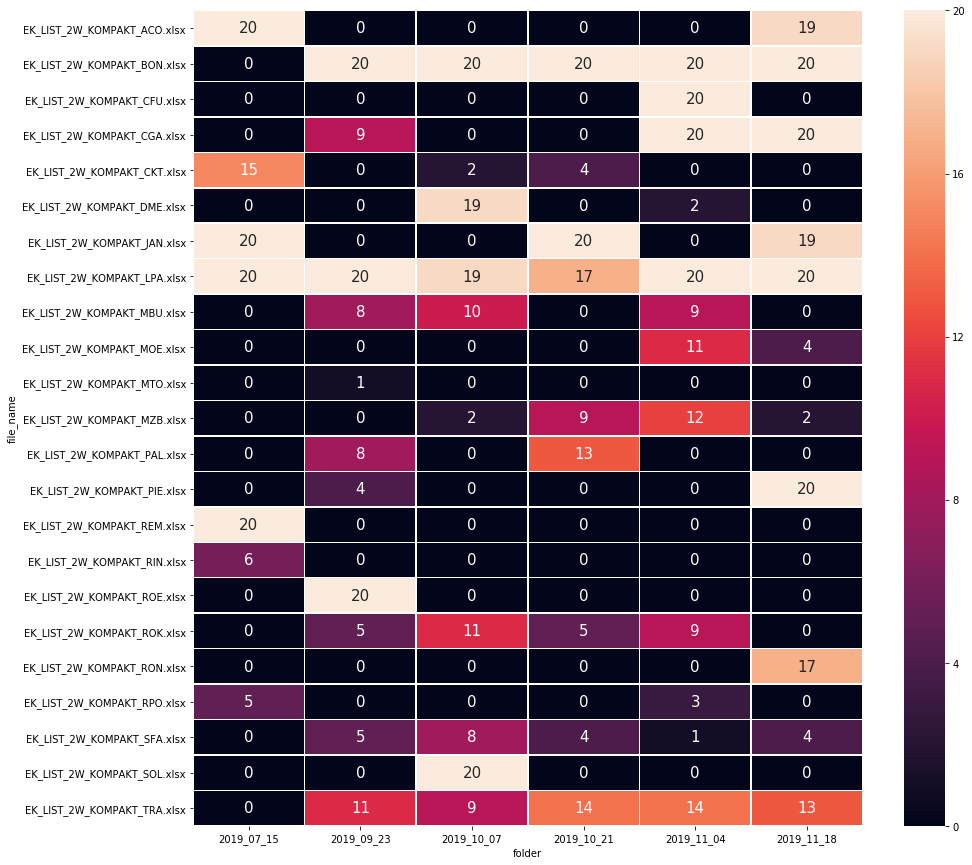

In [252]:
heatmap_data = pd.pivot_table(
    raw_feedback,
    index      = "folder",
    columns    = "file_name",
    values     = "Endkunde_NR",
    aggfunc    = np.count_nonzero,
    fill_value = 0
    ).T

plt.figure(figsize=(15,15))

ax = sns.heatmap(
    data       = heatmap_data,
    linewidths = 0.5,
    annot      = True,
    annot_kws={"size": 15},
    )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

***
> It's not fair to discriminate those, who don't participate. 
Not everybody receives the same amount of leads
***

# Feedback so far: helpful? not helpful?

In [201]:
(
raw_feedback
    .groupby("Feedback")
    .agg({"Endkunde": "count"})
    .sort_values("Endkunde",ascending=False)
)

,Endkunde
Feedback,
hilfreich,273
nicht hilfreich,253
nicht bearbeitet,42


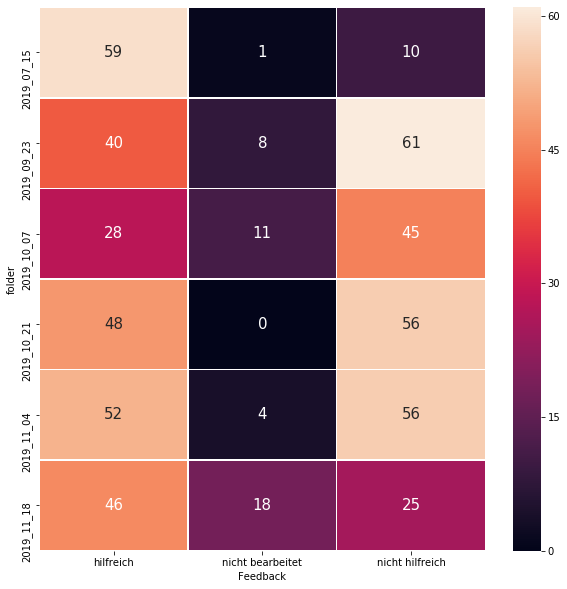

In [251]:
heatmap_pivot = (
    pd.pivot_table(
        raw_feedback,
        index      = "folder",
        columns    = "Feedback",
        values     = "Endkunde_NR",
        aggfunc    = np.count_nonzero,
        fill_value = 0
        )

    )

plt.figure(figsize=(10,10))

ax = sns.heatmap(
    data       = heatmap_pivot,
    linewidths = 0.5,
    annot      = True,
    annot_kws={"size": 15},

    )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

del heatmap_pivot

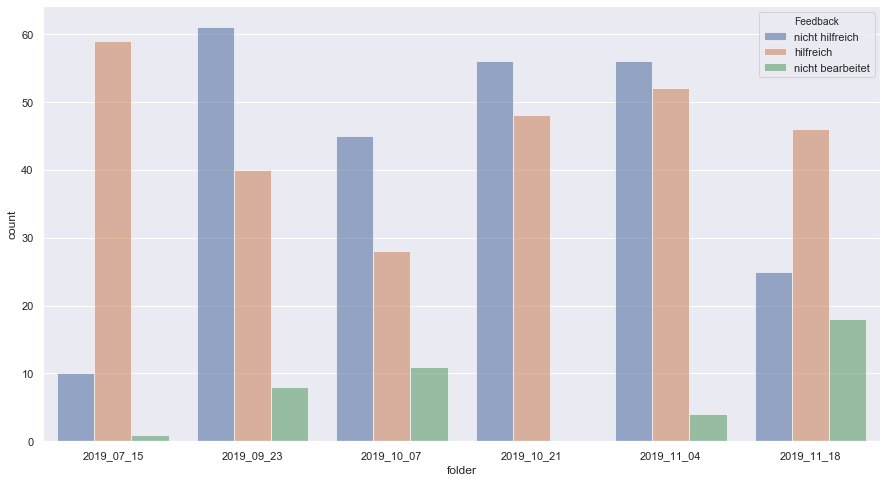

In [269]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = (
    sns.countplot(
        x     = "folder",
        hue   = "Feedback",
        data  = raw_feedback,
        alpha = 0.6,
        )
    )

***
> `hilfreich` and `nicht hilfreich` holding their balance
***

# Looking into `Kommentar`

## The bad ones: `nicht hilfreich`, `nicht bearbeitet`, `NaN`

In [253]:
not_helpful_rows = (
    ~raw_feedback
        .Feedback
        .isin({"hilfreich"}))

raw_feedback.loc[not_helpful_rows,:]

,Endkunde_NR,Endkunde,Prob_1,Feedback,Kommentar,folder,file_name
0,469781,CSL Immobilien AG,58.316522,NaN,Kunde ist in Zürich - Plakate sind abhängig von Objekten,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
1,519262,Hobi Moto AG,51.759579,NaN,via Ace 2 ACe,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
2,638475,Autoneum Management AG,51.302511,NaN,Autosalon Genf - Via MAT,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
3,515580,Verein Winterthurer Musikfestwochen,47.155711,NaN,"bin dran, gibt ein Sponsoring 2020",2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
4,139367,WEGA Messe AG,36.004276,NaN,Agentur wurde aufgelöst,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
6,637276,Grünliberale Partei Kanton Zürich,34.426872,NaN,Wahlen 2019,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
7,537586,VIVA für Frauen,31.002352,NaN,buchen nur F4 - Winterthur -neu bei NEO,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
8,471431,Gianni's Pizzakurier,29.506658,NaN,buchen nur F4 - Winterthur -neu bei NEO,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
9,544744,inhaus Messe GmbH,29.473159,NaN,Agentur wurde aufgelöst,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx
10,596555,Verein Hutzenlaub & Stäubli,29.241164,NaN,einmaliges Sponsoring,2019_11_18,EK_LIST_2W_KOMPAKT_ACO.xlsx


***
> 1. In den einzelnen Listen befinden sind politische Gruppierungen vorhanden. Nicht erwünscht.
2. Einige der Endkunden sind aufgelöst (zb. Insolvenz)
3. Einige Kunden buchen ausschliesslich über Agentur
4. Kunden sind eigentlich bei anderem Verkausberater
5. Einige Kunden haben für einmalige Events bei uns in der Vergangenheit gebucht. Keine Wiederholungen geplant (zb. Jubiläen)
***

## The Good Ones: `hilfreich`

In [254]:
helpful_rows = ~not_helpful_rows

In [255]:
raw_feedback.loc[helpful_rows,:]

,Endkunde_NR,Endkunde,Prob_1,Feedback,Kommentar,folder,file_name
1,640149,Schweizerische Mobiliar,52.455315,hilfreich,Sofort kontakt aufgenommen mit herr schmutz,2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
2,642120,Imperial Lounge Club GmbH,45.013510,hilfreich,Mail an Hito gemacht für 2020,2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
3,124916,Hotel Waldhaus,42.424343,hilfreich,"Kontakt mit Kde, noch offen ob etwas kommt",2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
7,582188,ONAX AG it solutions,39.726583,hilfreich,Aktion nochmals geschickt,2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
11,606382,Pur.Catering GmbH,37.057535,hilfreich,"Stehen im Kontakt mit Agentur, Budget steht noch nicht",2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
13,570719,BIKE EXPLORER,35.347227,hilfreich,"Aktion Thema, stehen im kontakt mit agentur",2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
14,510724,Open Air Lumnezia AG,34.470454,hilfreich,"Stehen im Kontakt mit Agentur, Budget steht noch nicht",2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
15,620421,oohh! fine fashion GmbH,34.209751,hilfreich,Aktion nochmals geschickt,2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
16,113679,Hotel Suvretta House,34.108619,hilfreich,Buchungen sind bereits erfolgt,2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx
17,570636,Velocenter Imholz AG,33.417290,hilfreich,Aktion nochmals geschickt,2019_11_18,EK_LIST_2W_KOMPAKT_BON.xlsx


***
> 1. Inkonsistente Beurteilung der Leeds. Obwohl vermerkt, dass Kunde kein Interesse hat, wird der Lead als `hilfreich` bewertet.
***

In [256]:
titanic = sns.load_dataset("titanic")

In [257]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
291,1,1,female,19.0,1,0,91.0792,C,First,woman,False,B,Cherbourg,yes,False
196,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
670,1,2,female,40.0,1,1,39.0000,S,Second,woman,False,NaN,Southampton,yes,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True
301,1,3,male,NaN,2,0,23.2500,Q,Third,man,True,NaN,Queenstown,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


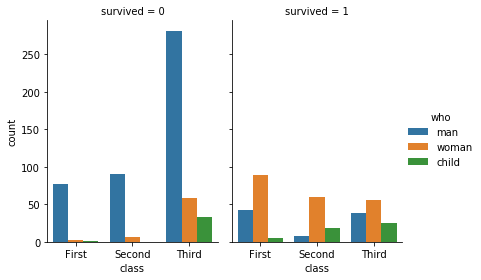

In [260]:
g = (
    sns.catplot(
        x="class",
        hue="who",
        col="survived",
        data=titanic,
        kind="count",
        height=4,
        aspect=.7,
        )
    )     